#### Focus 
We will try to lear about the CNN and compare it with traditional Neural Network for the result.
For this problem we will take MNIST Data set from one of the Kaggle Competition.<br>
Competetion URL : https://www.kaggle.com/c/digit-recognizer/data <br>
Tags : Classification, CNN, Image Classification. </br>
    
GOAL: To improve the accuracy more than 99     

In [1]:
import pandas as pd
import numpy as np 
import time
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle


In [2]:
data_dir = '/Users/amitjain/personalProjects/Machine-Learning/data-sets/digit-recognize/'
train_file = 'train.csv'
test_file = 'test.csv'
data = pd.read_csv( data_dir + train_file)

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(array([4132., 4684., 4177., 4351., 4072., 3795., 4137., 4401., 4063.,
        4188.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

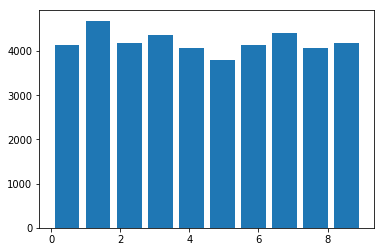

In [4]:
plt.hist(data.label, bins=10, rwidth=0.8)

In [5]:
def split_training_and_test(data_frame, training_percentage):
    training_number = data_frame.shape[0] * training_percentage / 100
    test_number = data_frame.shape[0] - training_number
    return data_frame.head(int(training_number)), data_frame.tail(int(test_number))

In [6]:
data = shuffle(data)
train, val = split_training_and_test(data, 80)

train_X = train.loc[:, train.columns !=  'label']
train_y = train['label']

val_X = val.loc[:, val.columns !=  'label']
val_y = val['label']

In [7]:
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
val_X = scaler.transform(val_X)

/Users/amitjain/anaconda2/envs/Python_35/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/amitjain/anaconda2/envs/Python_35/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/amitjain/anaconda2/envs/Python_35/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
train_X_mat = train_X.reshape(33600, 28, 28,1)
val_X_mat = val_X.reshape(8400, 28, 28, 1)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization
from keras.callbacks import TensorBoard


In [56]:
model=Sequential()

model.add(Conv2D(12,(5,5),strides=1,padding='valid', input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Conv2D(16,(5,5),strides=1,padding='valid'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))
model.add(Dropout(0.1))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(120,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(84,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='AdaDelta',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 24, 24, 12)        312       
_________________________________________________________________
batch_normalization_v1_15 (B (None, 24, 24, 12)        48        
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 12, 12, 12)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 12, 12, 12)        0         
_________________________________________________________________
activation_22 (Activation)   (None, 12, 12, 12)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 8, 8, 16)          4816      
_________________________________________________________________
batch_normalization_v1_16 (B (None, 8, 8, 16)          64        
__________

In [57]:
model.fit(train_X_mat, train_y, validation_data=(val_X_mat, val_y), epochs=20, batch_size = 128, verbose=1)

Train on 33600 samples, validate on 8400 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
33600/33600 [==============================] - 75s 2ms/sample - loss: 0.5160 - acc: 0.8420 - val_loss: 0.1574 - val_acc: 0.9513
Epoch 2/20
33600/33600 [==============================] - 76s 2ms/sample - loss: 0.1724 - acc: 0.9483 - val_loss: 0.0915 - val_acc: 0.9721
Epoch 3/20
33600/33600 [==============================] - 78s 2ms/sample - loss: 0.1179 - acc: 0.9630 - val_loss: 0.0666 - val_acc: 0.9789
Epoch 4/20
33600/33600 [==============================] - 80s 2ms/sample - loss: 0.0968 - acc: 0.9698 - val_loss: 0.0659 - val_acc: 0.9802
Epoch 5/20
33600/33600 [==============================] - 84s 2ms/sample - loss: 0.0849 - acc: 0.9731 - val_loss: 0.0481 - val_acc: 0.9843
Epoch 6/20
33600/33600 [==============================] - 84s 2ms/sample - loss: 0.0730 - acc: 0.9774 - val_loss: 0.0437 - val_acc: 0.9863
Epoch 7/20
33600/33600 [==============================] - 82s 2ms/sam

In [ ]:
model.save('/Users/amitjain/personalProjects/Machine-Learning/Complete_Guide_Self/CNN/cnn_tf_log/lexnet.model')


In [ ]:
test_data = pd.read_csv( data_dir + test_file)
test_X = test_data.loc[:, test_data.columns !=  'label']
test_X = scaler.transform(test_X)
test_X_mat = test_X.reshape(28000, 28, 28, 1)

In [ ]:
class_prediction = model.predict_classes(test_X_mat)


In [ ]:
result = pd.DataFrame(class_prediction)
result['Label'] = result[0]
result['ImageId'] = result.index + 1

In [ ]:
result.head()

In [ ]:
result.to_csv(index=False, 
              path_or_buf='/Users/amitjain/personalProjects/Machine-Learning/Complete_Guide_Self/CNN/cnn_tf_log/submission.csv',
             columns = ['ImageId', 'Label'])

In [ ]:
model = Sequential()
    
    # Multiple convolution operations to detect features in the images
    model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(32,kernel_size=3,activation='relu')) # no need to specify shape as there is a layer before
    model.add(BatchNormalization())
    model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4)) # reduce overfitting

    model.add(Conv2D(64,kernel_size=3,activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64,kernel_size=3,activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4)) # reduce overfitting
    
    # Flattening and classification by standard ANN
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    model.summary()